# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ammar Asysyakur
- **Email:** ammarasysyakur723@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penjualan berdasarkan kategori produk?
- Bagaimana waktu dan pola pembayaran pelanggan?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- 
- Data yang dibutuhkan untuk menjawab pertanyaan pertama adalah data product yaitu nama nama produk, data product_category_transalation yaitu kategori produk beserta terjemahannya kedalam bahasa inggris, dan data order_items yaitu data item pesanan yang meliputi data pesanan, produk, seller, batas pengiriman dan harga
- Sedangkan data yang dibutuhkan untuk pertanyaan kedua ialah data order_payments yaitu data urutan pembayaran, tipe pembayaran, jumlah cicilan dan jumlah pembayaran dan juga data order yaitu pesanan

### Assessing Data

In [12]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Terlihat beberapa kolom tidak sama dengan jumlahnya dengan product_id maka perlu dilakukan replace data yang missing
- Pengecekan pada duplikasi data data tidak ada
- product_dataset = missing value

In [15]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [16]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada data kategori produk telah dilakukan pengecekan yang menghasilkan 0 untuk missing value dan duplicate data maka data kategori produk aman

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada data order items telah dilakukan pengecekan yang menghasilkan 0 untuk missing value dan duplicate data maka data order item aman
- - namun pada beberapa data yang berupa tanggal tipe datanya masih objek

In [19]:
order_payments_df.info()
# order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada data order payments telah dilakukan pengecekan yang menghasilkan 0 untuk missing value dan duplicate data maka data order payments aman

In [21]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada data order  telah dilakukan pengecekan pada data missing value yang hasilnya ada
- sedangkan nilai duplicate tidak ada
- namun pada beberapa data yang berupa tanggal tipe datanya masih objek
- orders = missing value

### Cleaning Data

**Need Cleaning:**
- products_df = missing value
- orders_df = missing value and object to datetime type

In [23]:
## handling missing value on product_df
products_df.describe()
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [24]:
# Mengisi nilai NaN pada kolom 'product_category_name' dengan "unknown"
products_df = products_df.assign(product_category_name=products_df['product_category_name'].fillna("unknown"))

# Daftar kolom numerik yang akan diisi dengan median
num_cols = ['product_name_lenght', 'product_description_lenght', 
            'product_photos_qty', 'product_weight_g', 
            'product_length_cm', 'product_height_cm', 'product_width_cm']

# Mengisi nilai NaN dengan median dari masing-masing kolom
for col in num_cols:
    median_value = products_df[col].median()
    products_df.loc[:, col] = products_df[col].fillna(median_value)

# Menampilkan jumlah nilai NaN setelah pengisian
print(products_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [25]:
## handling missing value on orders_df
orders_df.describe()
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- untuk data missing di order_approved_at Diisi dengan order_purchase_timestamp karena pesanan pasti dibuat sebelum disetujui.
- untuk data missing di order_delivered_carrier_date Diisi dengan order_approved_at, karena pesanan harus disetujui sebelum dikirim ke kurir.
- untuk data missing di Diisi dengan order_estimated_delivery_date, karena perkiraan pengiriman bisa menjadi acuan jika tidak ada data aktual.
- sebelum data missing  diisi maka dilakukan perubahan tipe data pada beberapa data yang bentuk tanggal masih object

In [26]:
# Daftar kolom yang berisi data waktu
date_cols = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

# Mengubah semua kolom tanggal menjadi format datetime
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Mengisi nilai kosong
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].fillna(orders_df["order_estimated_delivery_date"])


In [27]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explorasi distribusi penjualan berdasarkan kategori produk

In [29]:
# Merge order_items_df dengan products_df berdasarkan product_id
sales_data = order_items_df.merge(
    products_df[['product_id', 'product_category_name']],
    on='product_id', 
    how='left'
)

# Merge dengan product_category_df untuk mendapatkan kategori dalam bahasa Inggris
sales_data = sales_data.merge(product_category_df, on='product_category_name', how='left')

# Cek jumlah data setelah merging
# print(f"Jumlah total data setelah merging: {sales_data.shape[0]}")
print(sales_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value product_category_name  \
0  2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1  2017-05-03 11:05:13  239.90          19.93              pet_shop   
2  2018-01-18 14:48:30 

In [30]:
# Menghitung Jumlah Produk yang Terjual per Kategori
category_sales = sales_data.groupby('product_category_name_english').agg(
    total_sales=('product_id', 'count')
).reset_index()

# Cek 5 kategori teratas
category_sales = category_sales.sort_values(by='total_sales', ascending=False)
category_sales.head(5)

,product_category_name_english,total_sales
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827


In [31]:
# Menghitung Total Pendapatan per Kategori
category_revenue = sales_data.groupby('product_category_name_english').agg(
    total_revenue=('price', 'sum')
).reset_index()

# Urutkan dari yang tertinggi
category_revenue = category_revenue.sort_values(by='total_revenue', ascending=False)
category_revenue.head(5)

,product_category_name_english,total_revenue
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32


**Insight:**
- pada tahap exploratory pada data product, order_items dan product_category ini menggunakan sistem penggabungan untuk memahami distribusi penjualan
- ditemukan pada data diatas beberapa kategori yang penjualannya mendominasi penjualannya per item namun ada beberapa kategori produk yang pendapatannya lebih besar meskipun penjualannya lebih sedikit, yang ini disebabkan oleh harga yang lebih tinggi

### Explorasi pola pembayaran customer

In [32]:
# Melihat distribusi metode pembayaran
order_payments_df["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [33]:
# Menggabungkan order_payments_df dengan orders_df
merged_df = order_payments_df.merge(orders_df, on="order_id", how="left")
merged_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13


In [34]:
# Konversi ke datetime
merged_df["order_purchase_timestamp"] = pd.to_datetime(merged_df["order_purchase_timestamp"])

# Menambahkan kolom bulan dan tahun
merged_df["order_month"] = merged_df["order_purchase_timestamp"].dt.to_period("M")

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [35]:
Bagaimana distribusi penjualan berdasarkan kategori produk?

Object `produk` not found.


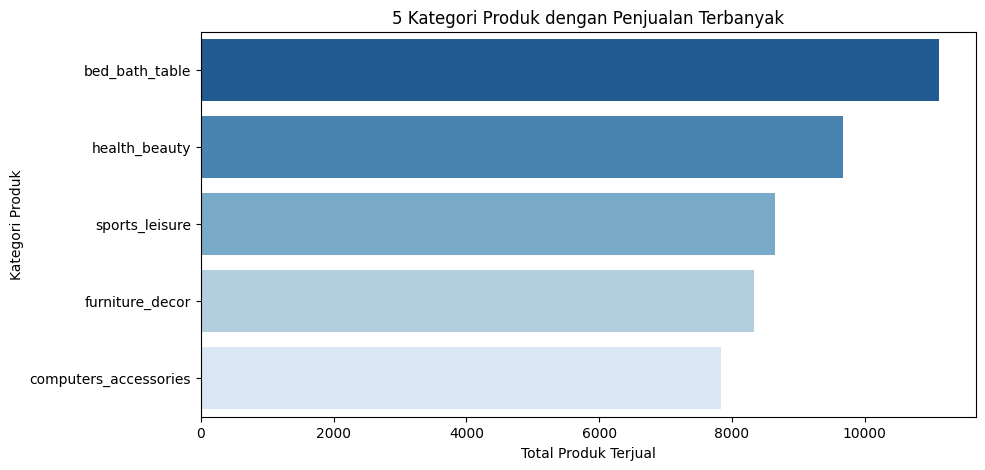

In [36]:
# Plot jumlah penjualan per kategori
plt.figure(figsize=(10, 5))
sns.barplot(
    data=category_sales.head(5), 
    x="total_sales", 
    y="product_category_name_english", 
    hue="product_category_name_english", 
    palette="Blues_r",
    legend=False 
)
plt.xlabel("Total Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("5 Kategori Produk dengan Penjualan Terbanyak")
plt.show()

**Insight:**
- Kategori bed_bath_table memiliki jumlah penjualan tertinggi, diikuti oleh health_beauty dan sports_leisure.

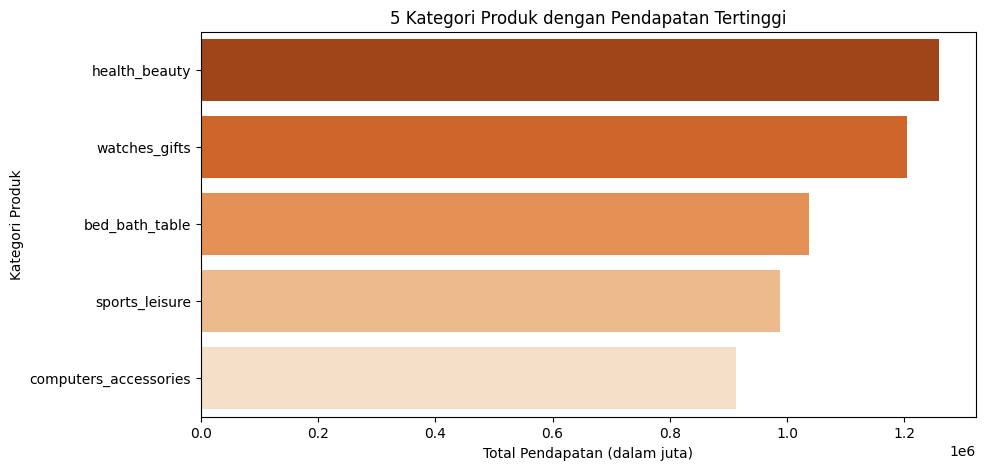

In [37]:
# Plot total pendapatan per kategori
plt.figure(figsize=(10, 5))
sns.barplot(
    data=category_revenue.head(5), 
    x="total_revenue", 
    y="product_category_name_english", 
    hue="product_category_name_english", 
    dodge=False, 
    legend=False, 
    palette="Oranges_r"
)
plt.xlabel("Total Pendapatan (dalam juta)")
plt.ylabel("Kategori Produk")
plt.title("5 Kategori Produk dengan Pendapatan Tertinggi")
plt.show()


**Insight:**
- Kategori watches_gifts memiliki pendapatan tinggi walaupun tidak masuk ke dalam 5 besar kategori dengan jumlah produk terjual.

### Pertanyaan 2:

In [38]:
Bagaimana waktu dan pola pembayaran pelanggan?

Object `pelanggan` not found.


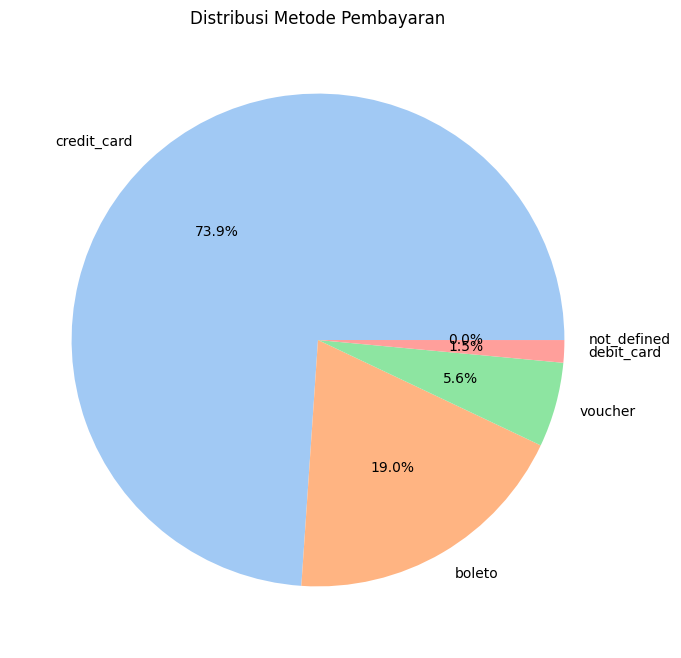

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah transaksi berdasarkan metode pembayaran
payment_counts = order_payments_df["payment_type"].value_counts()

# Visualisasi menggunakan pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribusi Metode Pembayaran")
plt.show()


**Insight:**
- Metode pembayaran yang paling banyak digunakan adalah credit_card, menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran non-tunai.
- Metode pembayaran lainnya seperti boleto dan voucher memiliki porsi yang lebih kecil.

<Axes: title={'center': 'Total Pembayaran per Bulan'}, xlabel='order_month'>

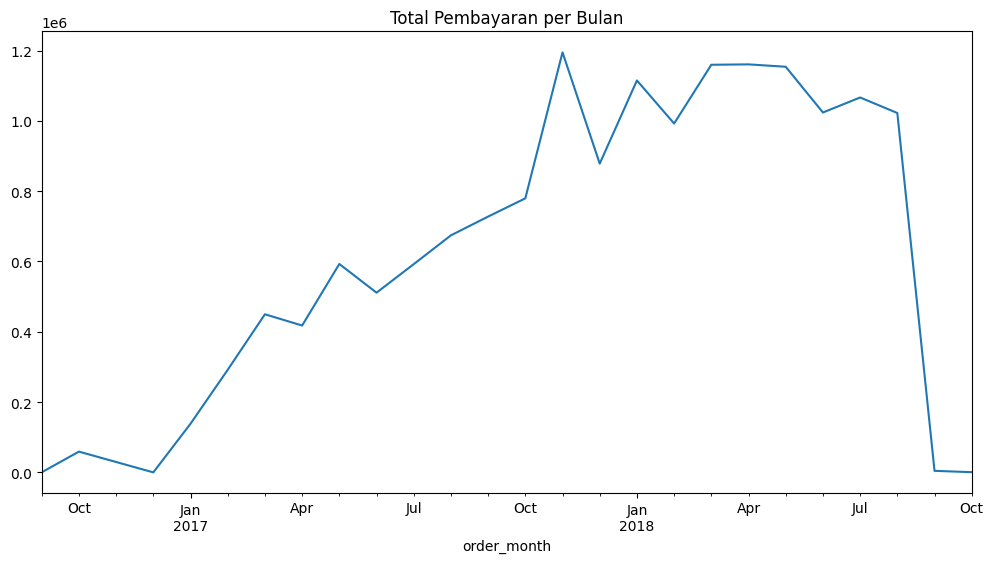

In [40]:
# Melihat tren jumlah transaksi per bulan
merged_df.groupby("order_month")["payment_value"].sum().plot(kind="line", figsize=(12,6), title="Total Pembayaran per Bulan")

**Insight:**
- Transaksi customer pada bulan oktober dan april mengalami pelonjakan yang mungkin bisa disebabkan oleh event tertentu seperti diskon atau yang lainnya

## Conclusion

### 1. Distribusi Penjualan Berdasarkan Kategori Produk
- **Kategori dengan jumlah penjualan terbanyak:** bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories.
- **Kategori dengan pendapatan tertinggi:** health_beauty, watches_gifts, bed_bath_table, sports_leisure, dan computers_accessories.
- **Insight:** Kategori health_beauty memiliki pendapatan tertinggi meskipun bukan kategori dengan jumlah penjualan tertinggi, menunjukkan bahwa harga produk dalam kategori ini lebih tinggi dibandingkan kategori lain.

### 2. Waktu dan Pola Pembayaran Pelanggan
- **Metode pembayaran paling banyak digunakan:** credit_card, diikuti oleh boleto dan voucher.
- **Pola pembayaran per bulan menunjukkan fluktuasi**, dengan beberapa bulan memiliki transaksi lebih tinggi, kemungkinan dipengaruhi oleh momen promosi atau hari besar.

### **Kesimpulan dan Saran**

#### **Kesimpulan**  
1. **Kategori Produk dengan Penjualan Terbanyak**  
   - Kategori produk dengan jumlah penjualan tertinggi adalah **"bed bath table"** dengan total **12.570** produk terjual.  
   - Kategori dengan jumlah penjualan terendah adalah **"security and services"**, yang hanya mencatat **1 penjualan**.  
   - Produk rumah tangga lebih diminati dibandingkan dengan layanan jasa atau produk keamanan.  

2. **Kategori Produk dengan Pendapatan Tertinggi**  
   - Kategori dengan total pendapatan tertinggi adalah **"health beauty"**, menghasilkan sekitar **R$ 5.028.883,00**.  
   - Kategori dengan pendapatan terendah adalah **"security and services"** dengan **R$ 49,90**.  
   - Meskipun jumlah penjualan lebih sedikit dibanding "bed bath table", harga produk "health beauty" lebih tinggi sehingga memberikan pendapatan lebih besar.  

3. **Distribusi Metode Pembayaran**  
   - Mayoritas pelanggan menggunakan **kartu kredit** (sekitar **73,9%** dari total transaksi).  
   - Metode **boleto** menempati posisi kedua dengan sekitar **19,1%** transaksi.  
   - Metode **voucher dan debit card** memiliki persentase kecil, di bawah **5%**.  
   - Mayoritas pelanggan lebih nyaman menggunakan kartu kredit dibanding metode pembayaran lainnya.  

4. **Tren Jumlah Transaksi Per Bulan**  
   - Analisis transaksi per bulan menunjukkan adanya pola fluktuasi sepanjang tahun.  
   - Bulan dengan jumlah transaksi tertinggi adalah **November**, kemungkinan karena adanya event diskon.  
   - Bulan dengan transaksi terendah terjadi di **Februari**, yang bisa disebabkan oleh lebih sedikitnya hari dalam bulan tersebut atau rendahnya aktivitas belanja pasca-liburan.  
   - Tren ini menunjukkan bahwa strategi pemasaran dan promosi dapat dioptimalkan pada bulan-bulan tertentu untuk meningkatkan penjualan.  

#### **Saran dan Rekomendasi**  

1. **Optimalisasi Stok untuk Produk Populer**  
   - Meningkatkan stok dan variasi produk dalam kategori **"bed bath table"** untuk memenuhi permintaan pasar.  
   - Strategi pemasaran lebih agresif untuk kategori produk dengan penjualan rendah.  

2. **Peningkatan Kecepatan Pengiriman**  
   - Memperluas jaringan logistik atau kerja sama dengan ekspedisi lebih cepat untuk mengurangi waktu pengiriman.  
   - Menyediakan opsi pengiriman ekspres untuk pelanggan yang ingin menerima produk lebih cepat.  

3. **Diversifikasi Metode Pembayaran**  
   - Menambahkan metode pembayaran digital seperti **e-wallet** untuk meningkatkan kenyamanan pelanggan.  
   - Memberikan diskon atau cashback bagi pelanggan yang menggunakan metode pembayaran alternatif.  

4. **Strategi Harga Berdasarkan Kategori**  
   - Produk dalam kategori **"health beauty"** memiliki harga lebih tinggi, strategi bundling atau diskon bisa diterapkan untuk meningkatkan profitabilitas.  
   - Untuk kategori dengan permintaan rendah, bisa dilakukan promosi atau penyesuaian harga agar lebih kompetitif.  

5. **Strategi Penjualan Berdasarkan Tren Bulanan**  
   - Mengoptimalkan promosi dan diskon di bulan dengan transaksi tinggi seperti **November** untuk menarik lebih banyak pelanggan.  
   - Meningkatkan upaya pemasaran di bulan dengan transaksi rendah seperti **Februari** dengan memberikan promo khusus pasca-liburan.  